# Heart Disease Prediction
#### In this model, a dataset of people having different descriptions and health problems is given. Among these, we have to predict which of the given people will get a heart disease in next 10 years, using PyTorch library.
## Loading the libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

train=pd.read_csv(r"C:\Users\samya\Downloads\framingham.csv")
train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Checking the duplicate rows

In [2]:
train_duplicate=train.drop_duplicates()
train_duplicate

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


## Checking for missing values

In [3]:
train.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

#### Thus, there are missing values in the 'education','cigsPerdDay','BPMeds','totChol','BMI','heartRate' and glucose' columns in the dataset which we are going to fill with median and mode for categorical and continous variables respectively.

### 'education'

In [4]:
train['education'].fillna(train['education'].median(),inplace=True)

### 'cigsPerDay'

In [5]:
train['cigsPerDay'].fillna(train['cigsPerDay'].median(),inplace=True)

### 'BPMeds'

In [6]:
train['BPMeds'].fillna(train['BPMeds'].median(),inplace=True)

### 'totChol'

In [7]:
train['totChol'].fillna(train['totChol'].median(),inplace=True)

### 'BMI'

In [8]:
train['BMI'].fillna(train['BMI'].median(),inplace=True)

### 'heartRate'

In [9]:
train['heartRate'].fillna(train['heartRate'].median(),inplace=True)

### 'glucose'

In [10]:
train['glucose'].fillna(train['glucose'].median(),inplace=True)

## Rounding off

In [11]:
train["totChol"]=train["totChol"].round()
train["sysBP"]=train["sysBP"].round()
train["diaBP"]=train["diaBP"].round()
train["BMI"]=train["BMI"].round()
train["heartRate"]=train["heartRate"].round()
train["glucose"]=train["glucose"].round()

In [12]:
corr_train=train.corr()["TenYearCHD"]
corr_train

male               0.088374
age                0.225408
education         -0.053570
currentSmoker      0.019448
cigsPerDay         0.058729
BPMeds             0.086448
prevalentStroke    0.061823
prevalentHyp       0.177458
diabetes           0.097344
totChol            0.081749
sysBP              0.216387
diaBP              0.144870
BMI                0.073829
heartRate          0.022851
glucose            0.121319
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64

In [13]:
train=train.drop("male",1)
train=train.drop("education",1)
train=train.drop("cigsPerDay",1)
train=train.drop("heartRate",1)

<AxesSubplot:>

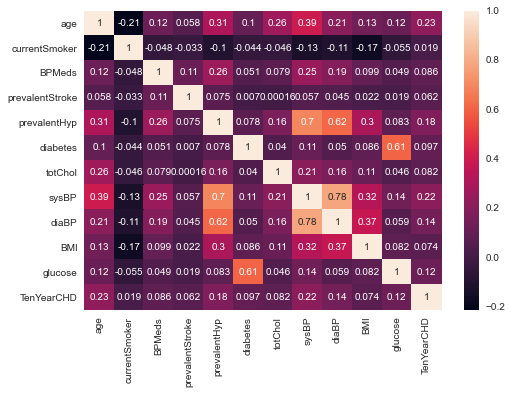

In [14]:
sb.heatmap(train.corr(),annot=True)

## Univariate Analysis

### 'age'

In [15]:
train["age"].describe()

count    4240.000000
mean       49.580189
std         8.572942
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

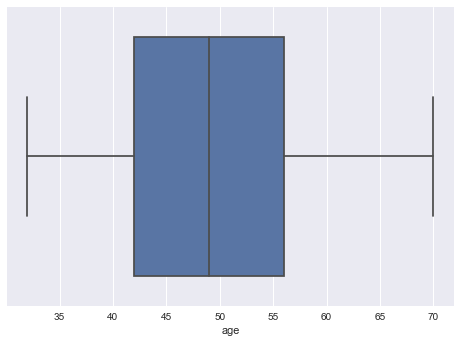

In [16]:
sb.boxplot("age",data=train)

#### Thus, no outliers in 'age'

### 'BPMeds'

In [17]:
train["BPMeds"].describe()

count    4240.000000
mean        0.029245
std         0.168513
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

<AxesSubplot:xlabel='BPMeds', ylabel='count'>

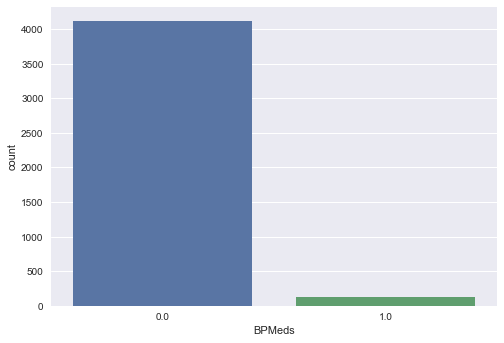

In [18]:
sb.countplot(x="BPMeds",data=train)

#### Majority of people don't use meds.
### 'prevalentStroke'

In [19]:
train["prevalentStroke"].describe()

count    4240.000000
mean        0.005896
std         0.076569
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: prevalentStroke, dtype: float64

<AxesSubplot:xlabel='prevalentStroke', ylabel='count'>

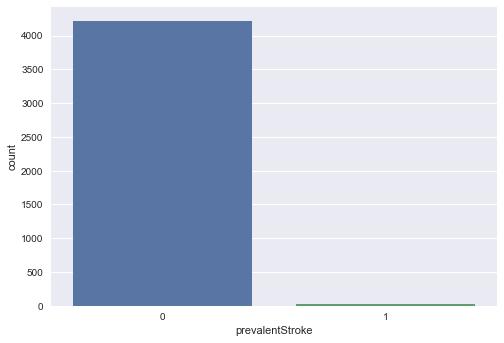

In [20]:
sb.countplot(x="prevalentStroke",data=train)

#### A very minute amount of people had prevalent stroke.
### 'prevalentHyp'

In [21]:
train["prevalentHyp"].describe()

count    4240.000000
mean        0.310613
std         0.462799
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: prevalentHyp, dtype: float64

<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

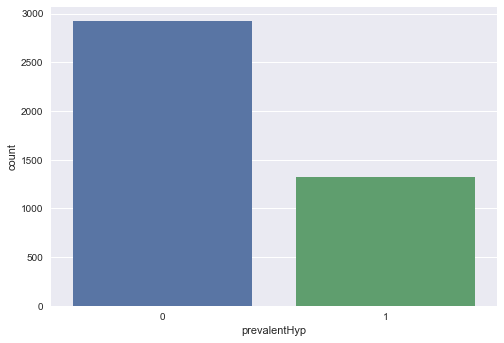

In [22]:
sb.countplot(x="prevalentHyp",data=train)

### 'diabatese'

In [23]:
train["diabetes"].describe()

count    4240.000000
mean        0.025708
std         0.158280
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: diabetes, dtype: float64

<AxesSubplot:xlabel='diabetes', ylabel='count'>

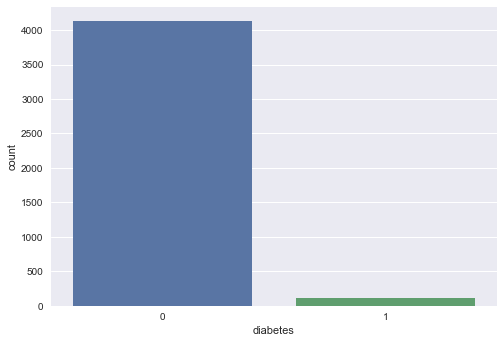

In [24]:
sb.countplot(x="diabetes",data=train)

#### A very minute amount of people have diabetes
### 'totChol'

In [25]:
train["totChol"].describe()

count    4240.000000
mean      236.667689
std        44.328480
min       107.000000
25%       206.000000
50%       234.000000
75%       262.000000
max       696.000000
Name: totChol, dtype: float64

<AxesSubplot:xlabel='totChol'>

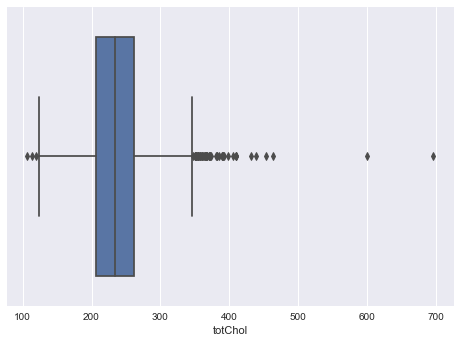

In [26]:
sb.boxplot(x="totChol",data=train)

In [27]:
train["totChol"].loc[train["totChol"]>350]=train["totChol"].median()
train["totChol"].loc[train["totChol"]<125]=train["totChol"].median()

C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:xlabel='totChol'>

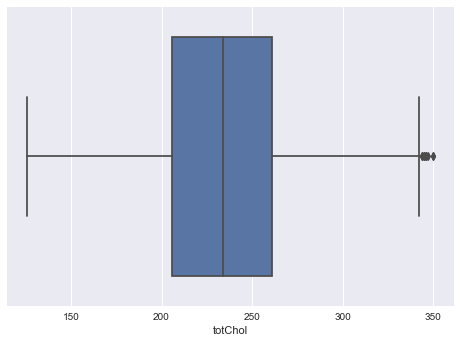

In [28]:
sb.boxplot(x="totChol",data=train)

#### All the outliers are corrected
### 'BMI'

In [29]:
train["BMI"].describe()

count    4240.000000
mean       25.798349
std         4.084637
min        16.000000
25%        23.000000
50%        25.000000
75%        28.000000
max        57.000000
Name: BMI, dtype: float64

<AxesSubplot:xlabel='BMI'>

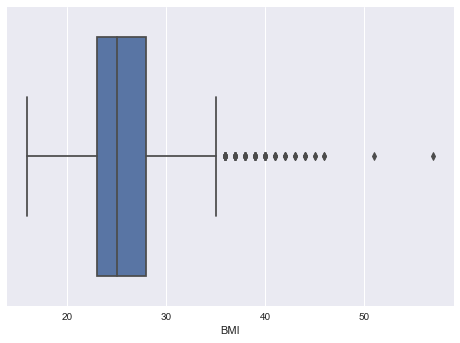

In [30]:
sb.boxplot(x="BMI",data=train)

#### There are many outliers here but we can't correct them with the median as these values will help in predicting the target variable.

### 'TenYearCHD'

In [31]:
train["TenYearCHD"].describe()

count    4240.000000
mean        0.151887
std         0.358953
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TenYearCHD, dtype: float64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

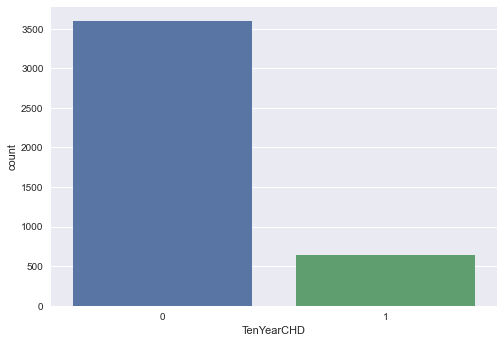

In [32]:
sb.countplot(x="TenYearCHD",data=train)

#### Thus, people having CHD are lower in number.
## Bivariate Analysis between target variable and 

### 'age'

In [33]:
train.groupby("age")["TenYearCHD"].mean()

age
32    0.000000
33    0.000000
34    0.000000
35    0.047619
36    0.035714
37    0.043478
38    0.055556
39    0.035294
40    0.078125
41    0.063218
42    0.077778
43    0.081761
44    0.096386
45    0.086420
46    0.087912
47    0.163121
48    0.121387
49    0.181818
50    0.164286
51    0.198630
52    0.214765
53    0.165468
54    0.136364
55    0.165517
56    0.219512
57    0.211382
58    0.264957
59    0.252101
60    0.234234
61    0.227273
62    0.252525
63    0.290909
64    0.225806
65    0.350877
66    0.394737
67    0.377778
68    0.444444
69    0.142857
70    0.500000
Name: TenYearCHD, dtype: float64

<AxesSubplot:xlabel='age', ylabel='TenYearCHD'>

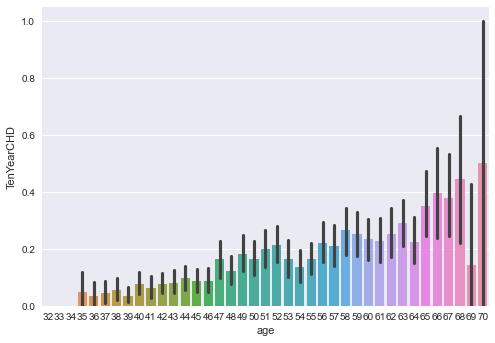

In [34]:
sb.barplot(x="age",y="TenYearCHD",data=train)

#### Thus, the chances of CHD increases with an increase in age

### 'currentSmoker'

In [35]:
train.groupby("currentSmoker")["TenYearCHD"].mean()

currentSmoker
0    0.144988
1    0.158950
Name: TenYearCHD, dtype: float64

<AxesSubplot:xlabel='currentSmoker', ylabel='TenYearCHD'>

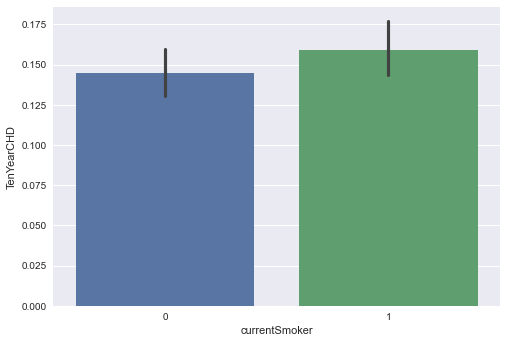

In [36]:
sb.barplot(x="currentSmoker",y="TenYearCHD",data=train)

#### Thus, the chances of getting CHD of smokers are higher.
### 'BPMeds'

In [37]:
train.groupby("BPMeds")["TenYearCHD"].mean()

BPMeds
0.0    0.146501
1.0    0.330645
Name: TenYearCHD, dtype: float64

<AxesSubplot:xlabel='BPMeds', ylabel='TenYearCHD'>

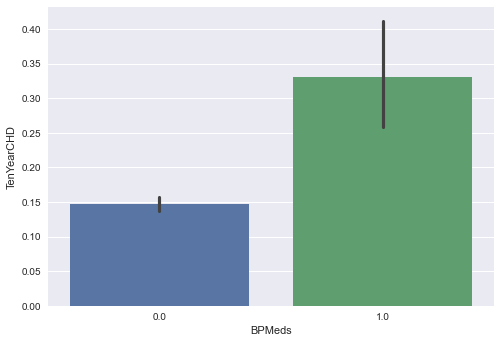

In [38]:
sb.barplot(x="BPMeds",y="TenYearCHD",data=train)

#### Thus, people taking meds have highers chances.
### 'prevalentStroke'

In [39]:
train.groupby("prevalentStroke")["TenYearCHD"].mean()

prevalentStroke
0    0.150178
1    0.440000
Name: TenYearCHD, dtype: float64

<AxesSubplot:xlabel='prevalentStroke', ylabel='TenYearCHD'>

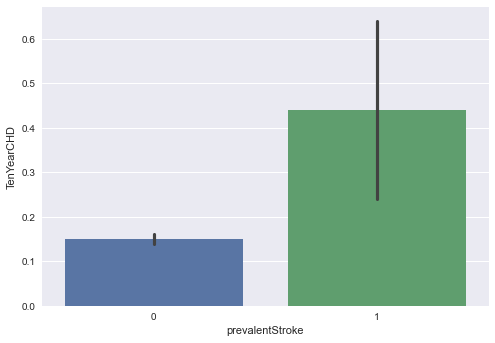

In [40]:
sb.barplot(x="prevalentStroke",y="TenYearCHD",data=train)

#### Thus, people having prevalent strokes have higher chances to get CHD.
### 'prevalentHyp'

In [41]:
train.groupby("prevalentHyp")["TenYearCHD"].mean()

prevalentHyp
0    0.109134
1    0.246773
Name: TenYearCHD, dtype: float64

<AxesSubplot:xlabel='prevalentHyp', ylabel='TenYearCHD'>

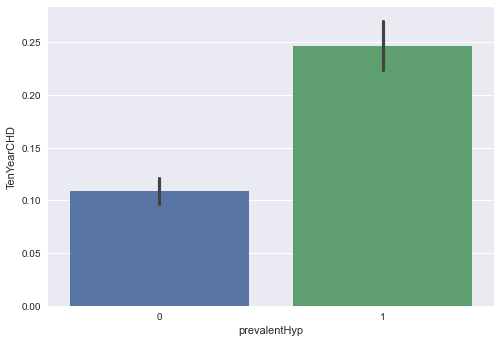

In [42]:
sb.barplot(x="prevalentHyp",y="TenYearCHD",data=train)

### 'diabetes'

In [43]:
train.groupby("diabetes")["TenYearCHD"].mean()

diabetes
0    0.146212
1    0.366972
Name: TenYearCHD, dtype: float64

<AxesSubplot:xlabel='TenYearCHD', ylabel='diabetes'>

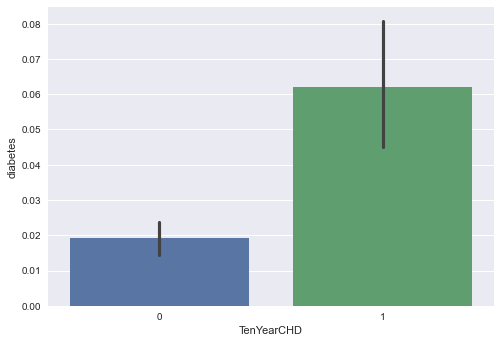

In [44]:
sb.barplot(x="TenYearCHD",y="diabetes",data=train)

#### Thus, people having higher diabetes value have higher chances of CHD.
### 'totChol'

In [45]:
train.groupby("totChol")["TenYearCHD"].mean()

totChol
126.0    0.000000
129.0    0.000000
133.0    1.000000
135.0    0.000000
137.0    0.000000
           ...   
344.0    0.000000
345.0    0.200000
346.0    0.285714
347.0    0.000000
350.0    0.333333
Name: TenYearCHD, Length: 208, dtype: float64

<AxesSubplot:xlabel='TenYearCHD', ylabel='totChol'>

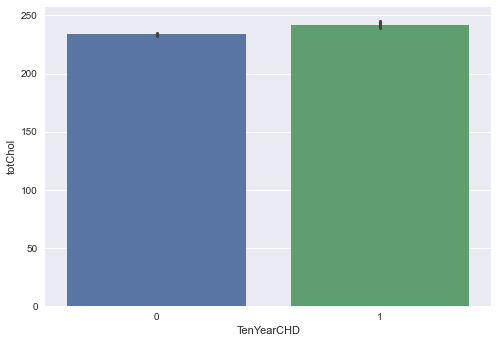

In [46]:
sb.barplot(x="TenYearCHD",y="totChol",data=train)

### 'BMI'

In [47]:
train.groupby("BMI")["TenYearCHD"].mean()

BMI
16.0    0.333333
17.0    0.294118
18.0    0.054054
19.0    0.119048
20.0    0.147436
21.0    0.117647
22.0    0.113333
23.0    0.136253
24.0    0.113043
25.0    0.155983
26.0    0.163311
27.0    0.128947
28.0    0.170807
29.0    0.191336
30.0    0.234043
31.0    0.162393
32.0    0.127660
33.0    0.239437
34.0    0.272727
35.0    0.146341
36.0    0.052632
37.0    0.266667
38.0    0.250000
39.0    0.357143
40.0    0.285714
41.0    0.400000
42.0    0.250000
43.0    0.333333
44.0    0.250000
45.0    0.000000
46.0    0.000000
51.0    0.000000
57.0    1.000000
Name: TenYearCHD, dtype: float64

<AxesSubplot:xlabel='TenYearCHD', ylabel='BMI'>

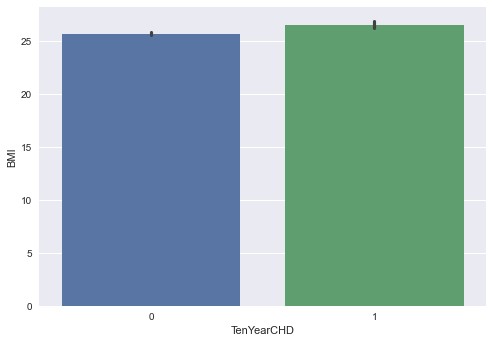

In [48]:
sb.barplot(x="TenYearCHD",y="BMI",data=train)

## Converting into x and y

In [49]:
x=train.drop(["TenYearCHD"],axis=1)

y=train["TenYearCHD"]

## Scaling the data

In [50]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

scaled_x=ss.fit_transform(x)
x=pd.DataFrame(scaled_x,columns=x.columns)

In [51]:
x.head()

,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose
0,-1.234283,-0.988276,-0.173569,-0.077014,-0.671241,-0.162437,-0.988602,-1.196296,-1.082500,0.294223,-0.201287
1,-0.417664,-0.988276,-0.173569,-0.077014,-0.671241,-0.162437,0.372170,-0.515390,-0.158864,0.783920,-0.245036
2,-0.184345,1.011863,-0.173569,-0.077014,-0.671241,-0.162437,0.248463,-0.197634,-0.242831,-0.195475,-0.507530
3,1.332233,1.011863,-0.173569,-0.077014,1.489778,-0.162437,-0.246363,0.801028,1.016673,0.783920,0.936188
4,-0.417664,1.011863,-0.173569,-0.077014,-0.671241,-0.162437,1.238115,-0.106847,0.093037,-0.685172,0.148705


In [52]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

## Creating train and test data for x and y

In [53]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,random_state=20,test_size=0.1)

In [54]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((3816, 11), (3816,), (424, 11), (424,))

## Creating tensors

In [55]:
import torch
import torch.nn.functional as fl
import torch.nn as nn

train_x=torch.FloatTensor(train_x.values)
train_y=torch.FloatTensor(train_y.values)
test_x=torch.FloatTensor(test_x.values)
test_y=torch.FloatTensor(test_y.values)

## Model Building

### Creating ANN class

In [56]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.d1=nn.Linear(11,16)
        self.d2=nn.Linear(16,16)
        self.f=nn.Linear(16,1)
    def forward(self,x):
        x=fl.relu(self.d1(x))
        x=fl.relu(self.d2(x))
        x=torch.sigmoid(self.f(x))
        return x
model=model()

In [57]:
model.parameters

<bound method Module.parameters of model(
  (d1): Linear(in_features=11, out_features=16, bias=True)
  (d2): Linear(in_features=16, out_features=16, bias=True)
  (f): Linear(in_features=16, out_features=1, bias=True)
)>

In [58]:
loss_function=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters())

In [59]:
from tqdm import tqdm
epochs=50
for i in tqdm(range(epochs)):
    i=i+1
    pred_train=model(train_x)
    loss=loss_function(pred_train.squeeze(),train_y)
    print("loss=",loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 427.44it/s]

loss= tensor(0.6605, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.6578, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.6550, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.6522, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.6495, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.6467, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.6440, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.6413, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.6385, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.6358, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.6331, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.6303, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.6276, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.6249, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.6222, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.6194, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.6167, grad_fn=<BinaryCrossEntropyBackward

In [60]:
pred_train=pred_train.detach().numpy()
pred_train=pd.DataFrame(pred_train,columns=["pred"])
pred_train["pred"]=pred_train["pred"].apply(lambda x:0 if x<0.5 else 1)

In [61]:
from sklearn.metrics import accuracy_score
print("The training score is=",100*accuracy_score(pred_train,train_y),"%")

The training score is= 85.03668763102725 %


In [62]:
from tqdm import tqdm
epochs=50
for i in tqdm(range(epochs)):
    i=i+1
    pred_test=model(test_x)
    loss=loss_function(pred_test.squeeze(),test_y)
    print("loss=",loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

loss= tensor(0.5358, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.5331, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.5303, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.5276, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.5249, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.5221, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.5194, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.5167, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.5141, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.5115, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.5089, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.5063, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.5038, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.5013, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.4988, grad_fn=<BinaryCrossEntropyBackward>)

100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 846.38it/s]


loss= tensor(0.4963, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.4939, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.4915, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.4892, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.4869, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.4846, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.4823, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.4801, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.4780, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.4759, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.4738, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.4717, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.4698, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.4678, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.4659, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.4641, grad_fn=<BinaryCrossEntropyBackward>)
loss= tensor(0.4623, grad_fn=<BinaryCrossEntropyBackwar

In [63]:
pred_test=pred_test.detach().numpy()
pred_test=pd.DataFrame(pred_test,columns=["pred"])
pred_test["pred"]=pred_test["pred"].apply(lambda x:0 if x<0.5 else 1)

In [64]:
print("The test score is=",100*accuracy_score(pred_test,test_y),"%")

The test score is= 82.78301886792453 %


#### Thus, as we can see our model is 82.8% effective.